Do not need to continue with all samples. Clearly its not getting any better. Real data is on average better than shuffled data, but shuffled data has large deviation which results in some of the highest scores, hence high p-values and increasing the fdrs on higher p-values

In [2]:
import pandas
import pickle
import itertools
import re
from pg import DB
db = DB()

In [8]:
motifNames_avg_scores = db.query("SELECT average_score FROM motifss where  average_score NOTNULL ").getresult()
motifNames_avg_scores_shuff = db.query("SELECT shuffled_average_score FROM motifss where  shuffled_average_score NOTNULL").getresult()



In [9]:
df = pandas.DataFrame(motifNames_avg_scores)
df.columns = ['real']
df_shuffled = pandas.DataFrame(motifNames_avg_scores_shuff )
df_shuffled.columns = ['shuffled']
# df["shuff"] = df_shuffled

# dfj = df.join(df_shuffled.set_index("motif"), on="motif")

In [10]:
df.describe()

,real
count,52656.000000
mean,0.073651
std,0.074417
min,0.020916
25%,0.035684
50%,0.044646
75%,0.081387
max,0.978573


In [11]:
df_shuffled.describe()

,shuffled
count,52656.000000
mean,0.043063
std,0.009837
min,0.021114
25%,0.035975
50%,0.041563
75%,0.048454
max,0.130866


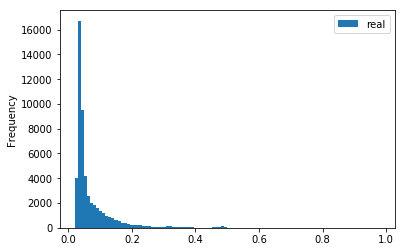

In [12]:
%matplotlib inline

import matplotlib
df.plot(kind='hist',bins=100)

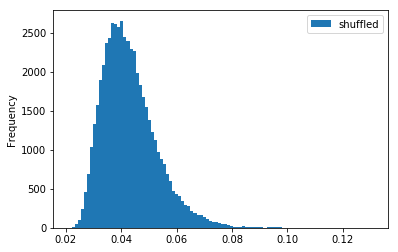

In [13]:
%matplotlib inline

import matplotlib
df_shuffled.plot(kind='hist',bins=100)

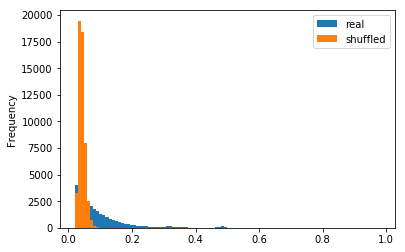

In [14]:
%matplotlib inline

import matplotlib
df['shuffled'] = df_shuffled
df.plot(kind='hist',bins=100)

In [602]:
df

,real,shuffled
0,0.044483,0.035080
1,0.030838,0.029109
2,0.040065,0.042383
3,0.031145,0.030149
4,0.032215,0.040980
5,0.032883,0.038873
6,0.040841,0.033809
7,0.034006,0.035831
8,0.034789,0.028118
9,0.031128,0.041061


In [15]:
random_sample_average_score = db.query("SELECT average_score FROM random_samples_average_score ").getresult()
tt_random_sample_average_score = db.query("SELECT tt_average_score FROM random_samples_average_score ").getresult()




In [16]:
df_samples = pandas.DataFrame(random_sample_average_score)
df_samples.describe()



,0
count,1.409357e+06
mean,2.779065e-02
std,2.091803e-02
min,-2.207551e-01
25%,2.200033e-02
50%,2.684579e-02
75%,3.223115e-02
max,1.000000e+00


In [23]:
tt_df_samples = pandas.DataFrame(tt_random_sample_average_score)
tt_df_samples.columns = ['tt_samples']


tt_df_samples.describe()


,tt_samples
count,1.408978e+06
mean,4.243935e-01
std,8.382341e-02
min,-2.207551e-01
25%,4.035731e-01
50%,4.335210e-01
75%,4.620319e-01
max,1.000000e+00


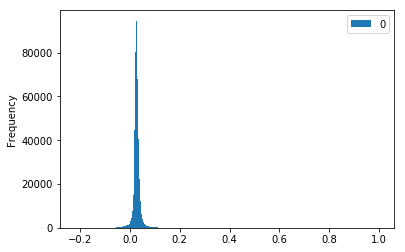

In [24]:
%matplotlib inline

import matplotlib
df_samples.plot(kind='hist',bins=1000)

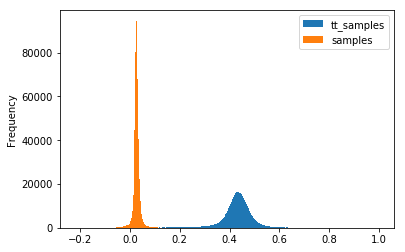

In [25]:
%matplotlib inline

import matplotlib
tt_df_samples["samples"] = df_samples
tt_df_samples.plot(kind='hist',bins=1000)


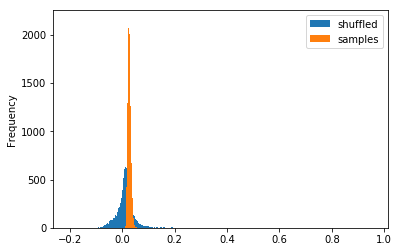

In [20]:
motifNames_avg_scores_shuffled = db.query("SELECT  shuffled_average_score FROM motif where  shuffled_average_score NOTNULL").getresult()
df_shuff = pandas.DataFrame(motifNames_avg_scores_shuffled)
df_shuff.columns = ['shuffled']
df_shuff["samples"] = df_samples
%matplotlib inline

import matplotlib
foo = df_shuff.plot(kind='hist',bins=1000)


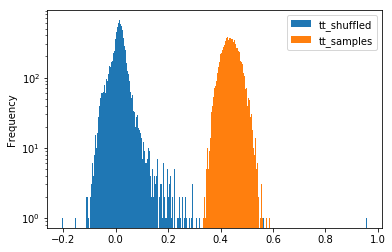

In [52]:
tt_motifNames_avg_scores_shuffled = db.query("SELECT  tt_shuffled_average_score FROM motif where  tt_shuffled_average_score NOTNULL").getresult()
df_shuff = pandas.DataFrame(motifNames_avg_scores_shuffled)
df_shuff.columns = ['tt_shuffled']
df_shuff["tt_samples"] = tt_df_samples["tt_samples"]



%matplotlib inline

import matplotlib
foo = df_shuff.plot(kind='hist',bins=1000, logy = True)



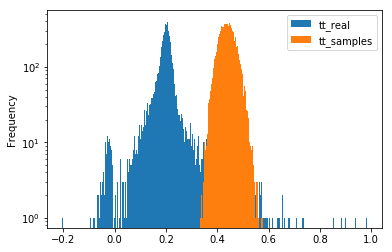

In [50]:
motifNames_avg_scores_real = db.query("SELECT  tt_average_score FROM motif where average_score NOTNULL and shuffled_average_score NOTNULL").getresult()
df_real = pandas.DataFrame(motifNames_avg_scores_real)
df_real.columns = ['tt_real']
df_real["tt_samples"] = tt_df_samples["tt_samples"]
%matplotlib inline

import matplotlib
foo = df_real.plot(kind='hist',bins=1000, logy = True)


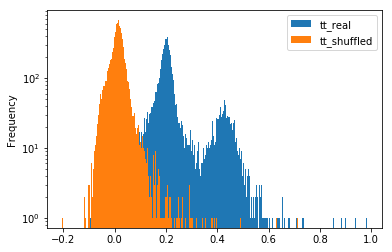

In [54]:
df_compare = pandas.DataFrame(motifNames_avg_scores_real)
df_compare.columns = ['tt_real']
df_compare["tt_shuffled"] = pandas.DataFrame(motifNames_avg_scores_shuffled)

df_compare.plot(kind='hist',bins=1000, logy = True)


In [46]:
motifNames_avg_scores_real = db.query("SELECT  average_score FROM motif where average_score NOTNULL and shuffled_average_score NOTNULL").getresult()
df_real = pandas.DataFrame(motifNames_avg_scores_real)
df_real.columns = ['real']
df_real["samples"] = df_samples
%matplotlib inline

import matplotlib
foo = df_real.plot(kind='hist',bins=1000)

NameError: name 'df_samples' is not defined

In [51]:
p_values = db.query("SELECT p_value, tt_p_value FROM motifss where p_value NOTNULL").getresult()
shuffled_p_values = db.query("SELECT shuffled_p_value, tt_shuffled_p_value FROM motifss where shuffled_p_value NOTNULL").getresult()


p_values_df = pandas.DataFrame( p_values)
p_values_df.columns = ["real_p_values", "tt_real_p_values"]
p_values_df["shuffled_p_values" ] = pandas.DataFrame(shuffled_p_values)[0]
p_values_df["tt_shuffled_p_values" ] = pandas.DataFrame(shuffled_p_values)[1]


# shuffled_p_values


In [52]:
p_values_df.describe()

,real_p_values,tt_real_p_values,shuffled_p_values,tt_shuffled_p_values
count,46099.000000,46099.000000,46099.000000,46099.000000
mean,0.059801,0.729458,0.075512,0.996897
std,0.092626,0.387696,0.093574,0.019715
min,0.000000,0.000000,0.000000,0.184500
25%,0.008800,0.434100,0.014000,0.999900
50%,0.022700,0.999800,0.041500,1.000000
75%,0.066800,1.000000,0.100800,1.000000
max,0.920300,1.000000,0.920900,1.000000


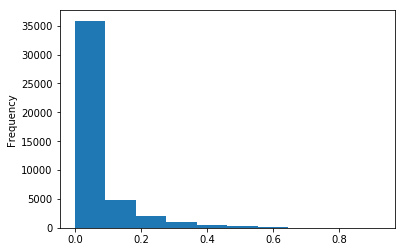

In [36]:
%matplotlib inline

import matplotlib
p_values_df["real_p_values"].plot(kind='hist' )

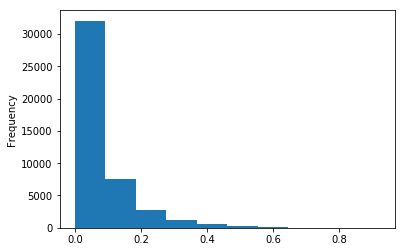

In [37]:
%matplotlib inline

import matplotlib
p_values_df["shuffled_p_values"].plot(kind='hist')

In [506]:
db.query("SELECT min(p_value) FROM motif where p_value > 0").getresult()



[(0.0006,)]

In [38]:
import numpy as np
thresholds = np.logspace(-1,2, num=100)/1000
thresholds

array([ 0.0001    ,  0.00010723,  0.00011498,  0.00012328,  0.00013219,
        0.00014175,  0.00015199,  0.00016298,  0.00017475,  0.00018738,
        0.00020092,  0.00021544,  0.00023101,  0.00024771,  0.00026561,
        0.0002848 ,  0.00030539,  0.00032745,  0.00035112,  0.00037649,
        0.0004037 ,  0.00043288,  0.00046416,  0.0004977 ,  0.00053367,
        0.00057224,  0.00061359,  0.00065793,  0.00070548,  0.00075646,
        0.00081113,  0.00086975,  0.0009326 ,  0.001     ,  0.00107227,
        0.00114976,  0.00123285,  0.00132194,  0.00141747,  0.00151991,
        0.00162975,  0.00174753,  0.00187382,  0.00200923,  0.00215443,
        0.00231013,  0.00247708,  0.00265609,  0.00284804,  0.00305386,
        0.00327455,  0.00351119,  0.00376494,  0.00403702,  0.00432876,
        0.00464159,  0.00497702,  0.0053367 ,  0.00572237,  0.00613591,
        0.00657933,  0.0070548 ,  0.00756463,  0.00811131,  0.00869749,
        0.00932603,  0.01      ,  0.01072267,  0.01149757,  0.01

In [39]:
smallest = 1/10000
fdrs = []
fdrs_d = {}
tt_fdrs_d={}
for threshold in thresholds:
    M = db.query("SELECT count(p_value) FROM motifss where p_value < '" + str(threshold) + "'").getresult()[0][0]
    tt_M = db.query("SELECT count(p_value) FROM motifss where tt_p_value < '" + str(threshold) + "'").getresult()[0][0]
    N = db.query("SELECT count(shuffled_p_value)FROM motifss where shuffled_p_value < '" + str(threshold) + "'").getresult()[0][0]
    tt_N = db.query("SELECT count(shuffled_p_value)FROM motifss where tt_shuffled_p_value < '" + str(threshold) + "'").getresult()[0][0]

    print(threshold, M, N)
    print(threshold, tt_M, tt_N)


    fdrs.append(N/M)
    fdrs_d[threshold] = (N+1)/(M+1)
    tt_fdrs_d[threshold] = (tt_N+1)/(tt_M+1)



0.0001 136 163
0.0001 5867 0
0.000107226722201 254 305
0.000107226722201 5867 0
0.00011497569954 254 305
0.00011497569954 5867 0
0.000123284673944 254 305
0.000123284673944 5867 0
0.000132194114847 254 306
0.000132194114847 5867 0
0.000141747416293 254 306
0.000141747416293 5867 0
0.000151991108295 254 306
0.000151991108295 5867 0
0.000162975083462 254 306
0.000162975083462 5867 0
0.000174752840001 254 306
0.000174752840001 5867 0
0.000187381742286 254 306
0.000187381742286 5867 0
0.000200923300257 355 428
0.000200923300257 5867 0
0.000215443469003 355 428
0.000215443469003 5867 0
0.000231012970008 355 428
0.000231012970008 5867 0
0.000247707635599 355 428
0.000247707635599 5867 0
0.000265608778295 355 428
0.000265608778295 5867 0
0.000284803586844 355 428
0.000284803586844 5867 0
0.000305385550883 488 520
0.000305385550883 5868 0
0.000327454916288 488 520
0.000327454916288 5868 0
0.000351119173422 488 520
0.000351119173422 5868 0
0.000376493580679 488 520
0.000376493580679 5868 0
0.00

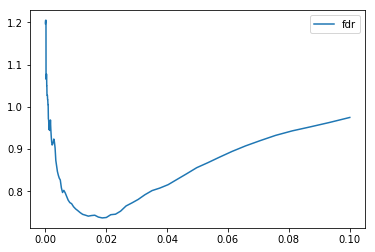

In [40]:
%matplotlib inline

import matplotlib
pandas.DataFrame({'fdr' :fdrs_d}).plot()

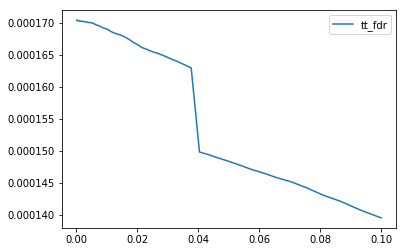

In [41]:
pandas.DataFrame({'tt_fdr' :tt_fdrs_d}).plot()

In [35]:
pandas.DataFrame({'fdr' :fdrs_d})

,fdr
0.000100,1.205882
0.000107,1.204724
0.000115,1.204724
0.000123,1.204724
0.000132,1.204724
0.000142,1.204724
0.000152,1.204724
0.000163,1.204724
0.000175,1.204724
0.000187,1.204724


In [36]:
pandas.DataFrame({'fdr' :tt_fdrs_d})

,fdr
0.000100,0.000170
0.000107,0.000170
0.000115,0.000170
0.000123,0.000170
0.000132,0.000170
0.000142,0.000170
0.000152,0.000170
0.000163,0.000170
0.000175,0.000170
0.000187,0.000170


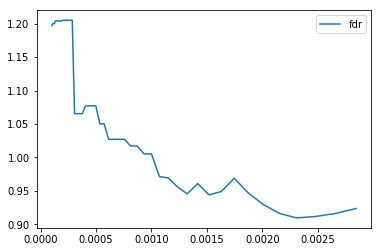

In [42]:
zoom = dict((key, value) for key, value in fdrs_d.items() if key < 0.003)
pandas.DataFrame({'fdr' :zoom}).plot()

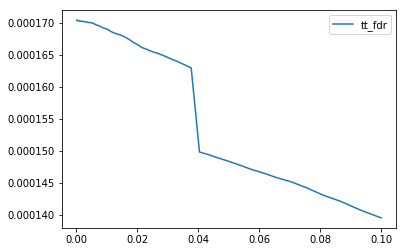

In [43]:
tt_zoom = dict((key, value) for key, value in tt_fdrs_d.items() if key < 0.3)
pandas.DataFrame({'tt_fdr' :tt_zoom}).plot()

In [39]:
localizaiton_n = db.query("SELECT count(p_value) FROM motifss where p_value < '0.005'").getresult()[0][0]
localizaiton_n

6514

In [40]:
localizaiton_n = db.query("SELECT count(tt_p_value) FROM motifss where tt_p_value < '0.005'").getresult()[0][0]
localizaiton_n

5881

In [41]:
thresholds[0]

0.0001

In [42]:
M = db.query("SELECT count(tt_p_value) FROM motifss where tt_p_value < '" + str(0.05) + "'").getresult()[0][0]
M
N = db.query("SELECT count(tt_shuffled_p_value)FROM motifss where tt_shuffled_p_value < '" + str(0.05) + "'").getresult()[0][0]




In [43]:
N

0

In [44]:
N/M

0.0

In [45]:
M = db.query("SELECT motif_string,tt_p_value FROM motifss where tt_p_value < '" + str(0.0001) + "' order by tt_p_value").getresult()
M[0:100]


[('ccgacacg', 0.0),
 ('ccgacaaa', 0.0),
 ('cgcaatta', 0.0),
 ('ccgacgac', 0.0),
 ('ccgacgtg', 0.0),
 ('ccgacggg', 0.0),
 ('ccgactac', 0.0),
 ('ccgatacg', 0.0),
 ('ccgatacc', 0.0),
 ('ccgatagc', 0.0),
 ('ccgatatc', 0.0),
 ('cttcgcgt', 0.0),
 ('ccgatcta', 0.0),
 ('ccgatcgt', 0.0),
 ('ccgattgg', 0.0),
 ('ccgcaaac', 0.0),
 ('ccgcaact', 0.0),
 ('ccgcaatc', 0.0),
 ('agcgcgat', 0.0),
 ('ctactcgt', 0.0),
 ('ccgccgta', 0.0),
 ('ccgcctaa', 0.0),
 ('ccgcgacg', 0.0),
 ('cccggacg', 0.0),
 ('cgatataa', 0.0),
 ('ccgcggta', 0.0),
 ('ccgcggtt', 0.0),
 ('ccgcgtca', 0.0),
 ('ccgcgtat', 0.0),
 ('ccgcgttg', 0.0),
 ('ccgctaat', 0.0),
 ('ccgctagc', 0.0),
 ('ccgctgat', 0.0),
 ('gtccggtc', 0.0),
 ('ccggatta', 0.0),
 ('ccggcgcg', 0.0),
 ('ccggcgac', 0.0),
 ('gcgagcgc', 0.0),
 ('ccggctag', 0.0),
 ('gtcgagta', 0.0),
 ('ccgggcga', 0.0),
 ('ccgggtac', 0.0),
 ('ccgggtta', 0.0),
 ('ccggtaga', 0.0),
 ('ccggtaac', 0.0),
 ('ccggtatc', 0.0),
 ('ccggttga', 0.0),
 ('ccgtaagg', 0.0),
 ('ccgtacac', 0.0),
 ('ccgtacgt', 0.0),


In [21]:
p_lengths = db.query("SELECT proteins_length FROM motifss ").getresult()
shuffled_p_lengths = db.query("SELECT shuffled_proteins_length FROM motifss ").getresult()




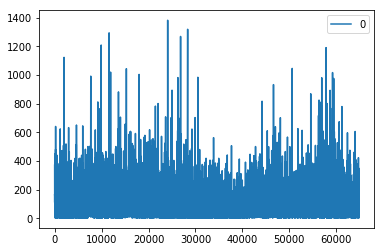

In [22]:
pandas.DataFrame(p_lengths).plot()

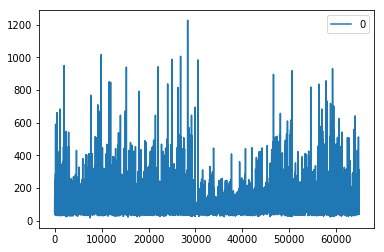

In [23]:
pandas.DataFrame(shuffled_p_lengths).plot()

In [ ]:
import seaborn as sns
%matplotlib inline

sns.heatmap(pandas.DataFrame(p_lengths), annot=True)

In [19]:
p_lengths_to_score = db.query("SELECT proteins_length, tt_average_score FROM motifss ").getresult()
shuffled_p_lengths_to_score = db.query("SELECT shuffled_proteins_length, tt_shuffled_average_score FROM motifss ").getresult()
smaples_p_lengths_to_score = db.query("SELECT size, tt_average_score FROM random_samples_average_score ").getresult()


df_lenghts_to_score = pandas.DataFrame(p_lengths_to_score)
df_lenghts_to_score.columns = ["lengths", "score"]

df_shuffled_lenghts_to_score = pandas.DataFrame(shuffled_p_lengths_to_score)
df_shuffled_lenghts_to_score.columns = ["lengths", "score"]

df_samples_lenghts_to_score = pandas.DataFrame(smaples_p_lengths_to_score)
df_samples_lenghts_to_score.columns = ["lengths", "score"]


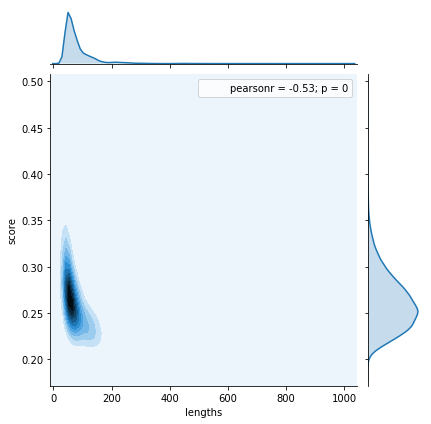

In [13]:
import seaborn as sns
%matplotlib inline
sns.jointplot(x="lengths", y="score", data=df_shuffled_lenghts_to_score, kind="kde");

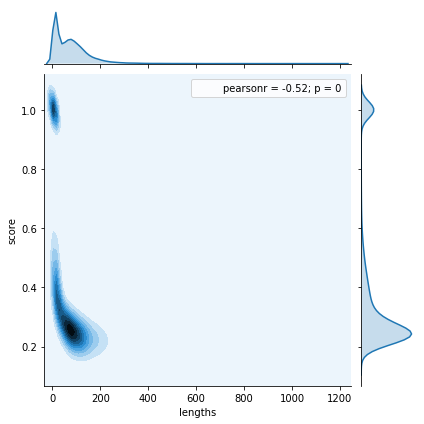

In [15]:
import seaborn as sns
%matplotlib inline
sns.jointplot(x="lengths", y="score", data=df_lenghts_to_score, kind="kde");

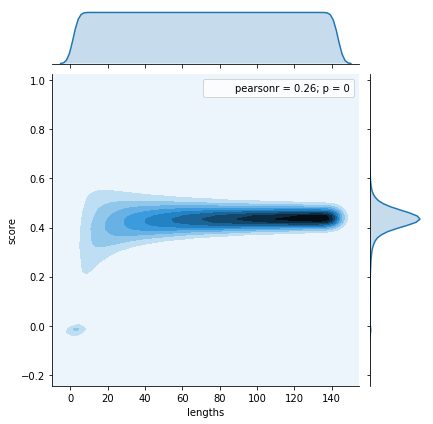

In [20]:
import seaborn as sns
%matplotlib inline
sns.jointplot(x="lengths", y="score", data=df_samples_lenghts_to_score, kind="kde");